Análises

1. Pessoas que repetiram a mesma matéria durante o período
2. Seguir o "quadrimestre ideal" do BC&T
3. Matérias escolhidas por pessoas que entraram no mesmo ano
4. Matérias com alto índice de reprovação devem ter maior mistura de alunos de anos de ingresso diferentes.  

Nota: Pros RAs de 8 digitos, o ano de ingresso são os dois ultimos dígitos

Estrutura do código: 
- Blocos individuais para cada "Parte" da execução
- Blocos para a filtragem dos CSVs
- Blocos para a construção dos grafos_por_quad_por_quad_por_quad_por_quad_por_quad
- Blocos para plotar os grafos

# O código de verdade começa aqui em baixo


In [1]:
# Inclusão das bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import igraph as ig


In [12]:
# Coisas aleatorias que podem ser uteis

# lista com os nomes dos arquivos de texto e csv sem o formato. tomara que dê pra iterar por 
# essa lista pra montar os csvs
filenames = ["2022_3_A", "2022_3_R", "2023_1_A", "2023_1_R" 
             , "2023_2_A",  "2023_2_R", "2023_3_A", "2023_3_R"
             , "2022_3_B", "2023_2_B"]

quads = ["2022_3", "2023_1", "2023_2", "2023_3"]

grafos_projetados_RA = {}
grafos_projetados_disciplina = {}

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
disciplinas_por_quad = {a:[] for a in quads}

In [13]:
# Código que forma os CSVs mesmo (tirando o dos bixos pq o pdf precisa de tratamentos diferentes)

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
disciplinas_por_quad = {a:[] for a in quads}

ger = open("CSVs/geral.csv", 'w')
ger.write("")
ger.close()

ger = open("CSVs/geral.csv", 'a')
ger.write("RA,TURMA\n")

for k in filenames:
    auxc = "CSVs/" + k[0:6] + ".csv"

    t = open(auxc, "w")
    t.write("")
    t.close()

for k in filenames[0:8]:
    if k[7] == "B": continue

    auxc = "CSVs/" + k[0:6] + ".csv"
    auxt = "TXTs/" + k + ".txt"

    a = open(auxt, "r", encoding="utf-8")
    b = open(auxc, "a", encoding="utf-8")

    cont = 0 # ponteiro pra saber o a linha mesmo. nn sei pq tem isso

    auxiliarR = []
    auxiliarD = []

    for i in a:

        ins = ""

        cont+= 1

        l = 0 # contador do caracter atual da linha

        if cont == 1: continue # Caso esteja na primeira linha, só pula

        if cont == 2: # Caso esteja na segunda linha, adiciona os indices do CSV
            b.write("RA,TURMA\n")

            continue
        else:
            if not i[0].isnumeric() or i[2] == "/" or i[3] == "/" or i[4] == "/": continue 
            # ^se o primeiro digito for um numero ou for um fim da pagina do pdf ele só pula a escrita

        RA = ""
        disc = ""

        while i[l] != " ": # pega o RA até o primeiro espaço
            RA+= i[l]
            l+=1
        l+=1

        while i[l] != " ": # pega o codigo da turma até o segundo espaço
            disc+= i[l]
            l+=1
        l+=1

        # no código da turma, pode valer a pena ver de armazenar o codigo da disciplina só, pq aí
        # conseguimos procurar o nome mesmo no catálogo pra printar bonitinho depois

        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad[k[0:6]]:
            RAs_por_quad[k[0:6]].append(RA)

        if disc not in disciplinas_por_quad[k[0:6]]: 
            disciplinas_por_quad[k[0:6]].append(disc)

        ins = RA + "," + disc + "\n"

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])

        b.write(ins)

    print("{}: OK".format(k))

    a.close()
    b.close()

# Montando o CSV dos bixos de 22 | filenames[8]

a = open("TXTs/2022_3_B.txt", "r", encoding="utf-8")
b = open("CSVs/2022_3.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

for i in a:
    if i[0:2] != "11": continue

    ins = ""
    RA = ""
    disc = ""
    l = 0 # contador de linha

    while i[l] != " ":
        RA+= i[l]
        l+=1

    while i[l] != "S": l+= 1

    l+=3

    while i[l] != " ":
        disc+= i[l]
        l+=1

    if RA not in RAs: RAs.append(RA)
    if RA not in RAs_por_quad["2022_3"]:
        RAs_por_quad["2022_3"].append(RA)

    if disc not in disciplinas_por_quad["2022_3"]: 
        disciplinas_por_quad["2022_3"].append(disc)

    ins = RA + "," + disc + "\n"

    if disc[2].isdigit(): 
        ger.write(RA + "," + disc[3:13] + "\n")
        if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
    else: 
        ger.write(RA + "," + disc[2:12] + "\n")
        if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
    
    b.write(ins)

a.close()
b.close()

print("2022_3_B: OK")

# Montando o CSV dos bixos de 23 | filenames[8]

a = open("TXTs/2023_2_B.txt", "r", encoding="utf-8")
b = open("CSVs/2023_2.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

ins = ""
RA = ""
disc = ""
cont = 0

for i in a:

    vai = False
    for aux in ['15S', '19SB', '18SB', '16SB', '18SA', '16SA']: 
        if aux in i: vai = True

    if not (i[0:2] == "11" or vai): continue

    l = 0 # contador de linha

    if len(i) > 16:
        while i[l] != " ":
            RA+= i[l]
            l+=1

        disc = i[len(i)-16:len(i)]
    else: 
        if len(i) == 12:
            RA = i[0:len(i)-1]
        elif len(i) == 16:
            disc = i[0:len(i)]

    if len(i) > 16 or (RA != "" and disc != ""):
        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad["2023_2"]:
            RAs_por_quad["2023_2"].append(RA)

        if disc not in disciplinas_por_quad["2023_2"]: 
            disciplinas_por_quad["2023_2"].append(disc)

        ins = RA + "," + disc

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
        
        b.write(ins)

        ins = ""
        RA = ""
        disc = ""

a.close()
b.close()

print("2023_2_B: OK")

ger.close()

2022_3_A: OK
2022_3_R: OK
2023_1_A: OK
2023_1_R: OK
2023_2_A: OK
2023_2_R: OK
2023_3_A: OK
2023_3_R: OK
2022_3_B: OK
2023_2_B: OK


In [14]:
# montando os grafos individuais

grafos_por_quad = {}

for k in quads:
    auxc = "CSVs/" + k + ".csv"    

    a = pd.read_csv(auxc) # Lê o csv do grafo

    b = a.to_numpy()

    grafos_por_quad[k] = nx.Graph()

    for i in b:
        grafos_por_quad[k].add_node((str)(i[0]), bipartite = 0)
        grafos_por_quad[k].add_node((str)(i[1]), bipartite = 1)
        grafos_por_quad[k].add_edge((str)(i[0]), (str)(i[1]))

    print("{} : {}".format(k, grafos_por_quad[k]))

grafo_global = nx.Graph()

auxiliar_grafo_geral = {}

ge = pd.read_csv("CSVs/geral.csv")

lis = ge.to_numpy()

# *np.unique(degree_sequence, return_counts=True) usar algo assim 

for i in lis: # esses pesos estão estranhos. 
    k = ((str)(i[0]), (str)(i[1]))

    if k not in auxiliar_grafo_geral: 
        auxiliar_grafo_geral[k] = 1 
    else: 
        auxiliar_grafo_geral[k]+= 1

for i in list(auxiliar_grafo_geral.items()):
    grafo_global.add_node((str)(i[0][0]), bipartite = 0)
    grafo_global.add_node((str)(i[0][1]), bipartite = 1)
    grafo_global.add_edge((str)(i[0][0]), (str)(i[0][1]), weight=i[1])

print(grafo_global)

2022_3 : Graph with 13246 nodes and 49227 edges
2023_1 : Graph with 12651 nodes and 44605 edges
2023_2 : Graph with 13595 nodes and 50131 edges
2023_3 : Graph with 13120 nodes and 47021 edges
Graph with 16036 nodes and 180496 edges


In [16]:
# print(list(grafo_global.nodes)) # isso aqui também está estranho

print(grafo_global.nodes)


['11002112', 'BHO1335-15', 'BHP0202-19', '11202130002', 'BCM0506-15', 'BCJ0203-15', 'MCTC002-15', 'BCN0405-15', '11202112038', 'BIS0005-15', 'BIL0304-15', 'NHZ5023-18', '11201921240', 'BIJ0207-15', 'BCK0103-15', 'ESZI045-17', 'ESTO012-17', '21077113', 'MCZB015-13', 'MCTB022-17', '11202021033', '11202130004', 'BIR0004-15', 'BIN0406-15', 'BCL0307-15', '11202111469', 'BHO0102-15', 'BHO1102-19', '11201721638', 'MCTB002-13', 'MCTB007-17', 'MCTA017-17', '11049814', 'ESZA018-17', 'ESTA022-17', '11202130357', 'BCJ0205-15', 'MCZC008-13', '11202022015', 'ESHP022-14', 'ESHT010-17', 'ESHR025-14', 'ESHP018-14', '11107815', 'ESHP004-13', 'ESHT023-17', 'NHZ2099-16', '11201811685', 'ESTO903-17', 'BCK0104-15', 'ESTO006-17', 'ESTO017-17', 'BCM0505-15', '11202020486', '11201721630', 'ESTU023-17', 'NHZ5020-15', 'ESZG013-17', 'NHI5011-13', '11201921313', '11102814', 'ESTI007-17', 'ESTI005-17', 'ESTI003-17', '21070012', 'ESHT013-17', '11042216', 'BCN0407-15', 'ESTO008-17', 'BCS0002-15', '11201723015', 'NHZ6

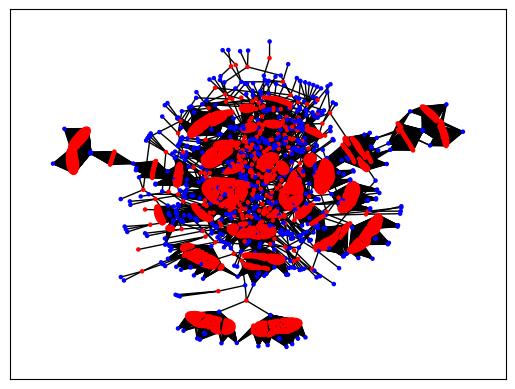

In [54]:
arestas_bixos_22 = []

for i in grafos_por_quad["2022_3"].edges():
    if "112022" in i[0] or "112022" in i[1]: arestas_bixos_22.append(i)

te = nx.edge_subgraph(grafos_por_quad["2022_3"], arestas_bixos_22)

color = []

k = nx.get_node_attributes(te, "bipartite")

for i in k:
    if k[i] == 0:
        color.append("#ff0000")
    else: 
        color.append("#0000ff")

args = {
    "G":te, 
    "node_size":20, 
    "node_shape":".", 
    "node_color":color, 
    "with_labels":False, 
    "arrows":False,
    "pos":nx.kamada_kawai_layout(te)
}

nx.draw_networkx(**args)
plt.savefig("test.svg")

In [ ]:
ge = pd.read_csv("CSVs/geral.csv")

nn = list(ge.to_numpy())

print(nn)

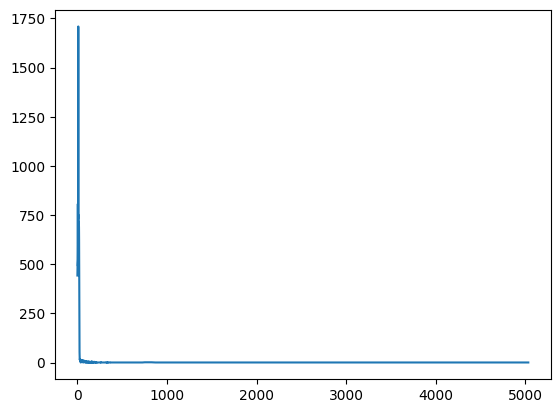

In [32]:
degree_sequence = sorted((d for n, d in grafo_global.degree()), reverse=True)

ax2 = plt.plot(*np.unique(degree_sequence, return_counts=True))

plt.show()

In [8]:
lis = nx.get_node_attributes(grafo_global, "bipartite")
print(lis)

{'11002112': 0, 'BHO1335-15': 1, 'BHP0202-19': 1, '11202130002': 0, 'BCM0506-15': 1, 'BCJ0203-15': 1, 'MCTC002-15': 1, 'BCN0405-15': 1, '11202112038': 0, 'BIS0005-15': 1, 'BIL0304-15': 1, 'NHZ5023-18': 1, '11201921240': 0, 'BIJ0207-15': 1, 'BCK0103-15': 1, 'ESZI045-17': 1, 'ESTO012-17': 1, '21077113': 0, 'MCZB015-13': 1, 'MCTB022-17': 1, '11202021033': 0, '11202130004': 0, 'BIR0004-15': 1, 'BIN0406-15': 1, 'BCL0307-15': 1, '11202111469': 0, 'BHO0102-15': 1, 'BHO1102-19': 1, '11201721638': 0, 'MCTB002-13': 1, 'MCTB007-17': 1, 'MCTA017-17': 1, '11049814': 0, 'ESZA018-17': 1, 'ESTA022-17': 1, '11202130357': 0, 'BCJ0205-15': 1, 'MCZC008-13': 1, '11202022015': 0, 'ESHP022-14': 1, 'ESHT010-17': 1, 'ESHR025-14': 1, 'ESHP018-14': 1, '11107815': 0, 'ESHP004-13': 1, 'ESHT023-17': 1, 'NHZ2099-16': 1, '11201811685': 0, 'ESTO903-17': 1, 'BCK0104-15': 1, 'ESTO006-17': 1, 'ESTO017-17': 1, 'BCM0505-15': 1, '11202020486': 0, '11201721630': 0, 'ESTU023-17': 1, 'NHZ5020-15': 1, 'ESZG013-17': 1, 'NHI5011-

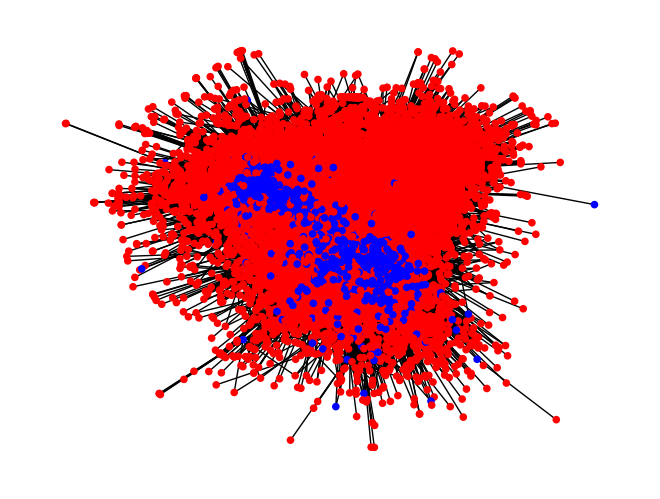

In [22]:
# G = ig.Graph.from_networkx(grafo_global)
color = []

k = nx.get_node_attributes(grafo_global, "bipartite")

for i in k:
    if k[i] == 0:
        color.append("#ff0000")
    else: 
        color.append("#0000ff")


nx.draw(grafo_global, node_size=20, node_color=color, node_shape='o')
plt.show()

In [10]:
# monta um dicionario com o grau de cada vertice individual

a = nx.degree_centrality(grafos_por_quad[quads[0]])

a.update((x, y*13245) for x, y in a.items()) # multiplica a centralidade de grau por n-1

print(a)

{'11002112': 2.0, 'NA1BHO1335-15SB': 93.00000000000001, 'DB1BHP0202-19SB': 87.00000000000001, '11202130002': 4.0, 'DA1BCM0506-15SB': 74.00000000000001, 'DA1BCJ0203-15SB': 29.000000000000004, 'DA1MCTC002-15SB': 60.00000000000001, 'NB1BCN0405-15SB': 41.00000000000001, '11202112038': 3.0, 'DB5BIS0005-15SB': 42.00000000000001, 'NC1BIL0304-15SB': 83.00000000000001, 'NB1NHZ5023-18SA': 44.00000000000001, '11201921240': 5.000000000000001, 'DC2BIJ0207-15SA': 78.00000000000001, 'DA1BCK0103-15SA': 63.00000000000001, 'DA1ESZI045-17SA': 36.00000000000001, 'DA1BCN0405-15SA': 53.0, 'DA1ESTO012-17SA': 96.0, '21077113': 3.0, 'NA1BCJ0203-15SA': 35.0, 'NA1MCZB015-13SA': 79.00000000000001, 'NA1MCTB022-17SA': 51.0, '11202021033': 1.0, 'NA3BCJ0203-15SA': 35.0, '11202130004': 4.0, 'DA1BIR0004-15SA': 90.00000000000001, 'DA1BCM0506-15SA': 94.00000000000001, 'DA1BIN0406-15SA': 45.00000000000001, 'DA1BCL0307-15SA': 31.000000000000004, '11202111469': 5.000000000000001, 'DA1BIJ0207-15SB': 91.00000000000001, 'DA1BI

In [11]:
# isso projeta o grafo original com os pesos sendo as turmas compartilhadas pelas pessoas
# do jeito q está escrto agora isso mede o tamanho médio das turmas - DAORA

g2 = nx.bipartite.weighted_projected_graph(grafo_global, RAs) 

C = 0

print(g2)

for k in list(nx.get_edge_attributes(g2, "weight").values()):
    C+= k

print(C / len(RAs))

NameError: name 'RAs' is not defined